# Synthetic Sonic Log Generation 

### <a> Data Decription</a>
#### Files
&gt; #### train.csv
All the values equals to -999 are marked as missing values.
- CAL - Caliper, unit in Inch,  
- CNC - Neutron, unit in dec 
- GR - Gamma Ray, unit in API
- HRD - Deep Resisitivity, unit in Ohm per meter,
- HRM - Medium Resistivity, unit in Ohm per meter,
- PE - Photo-electric Factor, unit in Barn,
- ZDEN - Density, unit in Gram per cubit meter, 
- DTC - Compressional Travel-time, unit in nanosecond per foot,
- DTS - Shear Travel-time, unit in nanosecond per foot,


&gt; #### test.csv
The test data has all features that you used in the train dataset, except the two sonic curves DTC and DTS.

&gt; ####  sample_submission.csv
A valid sample submission.
<p><font style="">
</font></p>

## <a>2. Imports</a>

<a>Top</a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPRegressor


## <a>3. Read Data</a>

<a>Top</a>

In [2]:
df1 = pd.read_csv('train.csv')


## <a>4. Glimps Data</a>

<a>Top</a>

In [3]:
df1.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## <a>5. Exploratory Data Analysis</a>

<a>Top</a>

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, missing values, outliers, anomalies, patterns, or relationships within the data. 

In [4]:
# remove all rows that contains missing value
df1.replace(['-999', -999], np.nan, inplace=True)
df1.dropna(axis=0, inplace=True)
df1.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [5]:
df1.columns.tolist()

['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN', 'DTC', 'DTS']

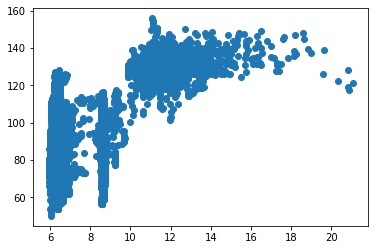

In [6]:
# check if there's any co-linearity between features
# you may check this for all of the features and see if there's any good finding. 
plt.scatter(df1['CAL'], df1['DTC'])

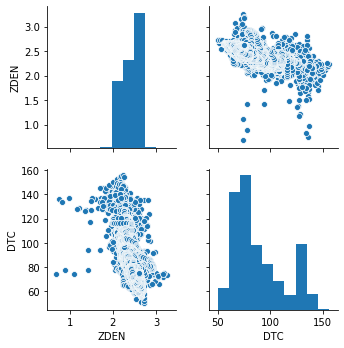

In [7]:
# another library from Seaborn to check the co-linearity
sb.pairplot(df1[['ZDEN', 'DTC']])

## <a>6. Build Machine Learning Models</a>

<a>Top</a>

In [37]:
# seperate the features and targets
df1_data= df1.values
print(df1_data.shape)
y_trainwell1 = df1_data[:,-2:]
x_trainwell1 = df1_data[:,:-2]

# standize the matrix for training data
from sklearn import preprocessing
scaler = StandardScaler()
x_trainwell1 = scaler.fit_transform(x_trainwell1)

(20525, 9)


In [38]:
print(y_trainwell1[:5][:])
print(y_trainwell1.shape)

[[125.9611 306.8676]
 [125.9726 305.8347]
 [125.8528 305.9089]
 [125.7362 305.1737]
 [125.9774 304.4476]]
(20525, 2)


In [39]:
# train test split
# please remember to use random_state for all randomization steps, this will ensure we get the same results 
# as yours during the validation phase. 
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(x_trainwell1, y_trainwell1, test_size=0.2, random_state=100)
print(X_train.shape)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
print(y_train.shape)

(16420, 7)
(16420, 2)


In [40]:
#predicting using ANN
from keras.models import Sequential
from keras.layers import Dense
# Building An MLP 
from keras.layers import Flatten
model = Sequential() 
model.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

# Model summary 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 6         
Total params: 944
Trainable params: 944
Non-trainable params: 0
_________________________________________________________________


## <a>7. Prediction</a>

In [41]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=30,
          validation_data=(X_val, y_val))

Train on 16420 samples, validate on 2052 samples
Epoch 1/30
16420/16420 [==============================] - 12s 701us/step - loss: 14896.2789 - acc: 0.9918 - val_loss: 7582.6470 - val_acc: 1.0000
Epoch 2/30
16420/16420 [==============================] - 11s 641us/step - loss: 4953.2551 - acc: 1.0000 - val_loss: 2455.9028 - val_acc: 1.0000
Epoch 3/30
16420/16420 [==============================] - 12s 703us/step - loss: 1760.6651 - acc: 1.0000 - val_loss: 891.1915 - val_acc: 1.0000
Epoch 4/30
16420/16420 [==============================] - 11s 655us/step - loss: 932.9070 - acc: 1.0000 - val_loss: 599.1459 - val_acc: 1.0000
Epoch 5/30
16420/16420 [==============================] - 11s 668us/step - loss: 658.2831 - acc: 1.0000 - val_loss: 532.0072 - val_acc: 1.0000
Epoch 6/30
16420/16420 [==============================] - 11s 683us/step - loss: 531.7066 - acc: 0.9999 - val_loss: 493.5442 - val_acc: 1.0000
Epoch 7/30
16420/16420 [==============================] - 10s 635us/step - loss: 456.36

<a>Top</a>

In [42]:
# load test data from well 2
df2 = pd.read_csv('test.csv')
# Remove missing 
for col in df2.columns.tolist():
    df2[col][df2[col]==-999] = np.nan
df2.dropna(axis=0, inplace=True)
df2_data = np.array(df2)
x_trainwell2 = df2_data
x_trainwell2 = scaler.transform(x_trainwell2)
#print(y_trainwell2.head())
print(x_trainwell2[:5][:])

[[ 0.08203273  0.02536682  0.09657322 -0.51553228 -0.01196495  0.68453048
  -0.46851864]
 [ 0.08203273  0.02921998  0.12994323 -0.51792726 -0.01198555  0.68016548
  -0.46906897]
 [ 0.08203273  0.03130983  0.16488049 -0.53506725 -0.01214533  0.67253243
  -0.49273318]
 [ 0.07358141  0.03013429  0.13577067 -0.54300242 -0.01226511  0.66003161
  -0.54391391]
 [ 0.08203273  0.02468108  0.05789392 -0.55235151 -0.01236761  0.640949
  -0.61930917]]


2053/2053 [==============================] - 0s 164us/step

The model is 99.95% Accurate.


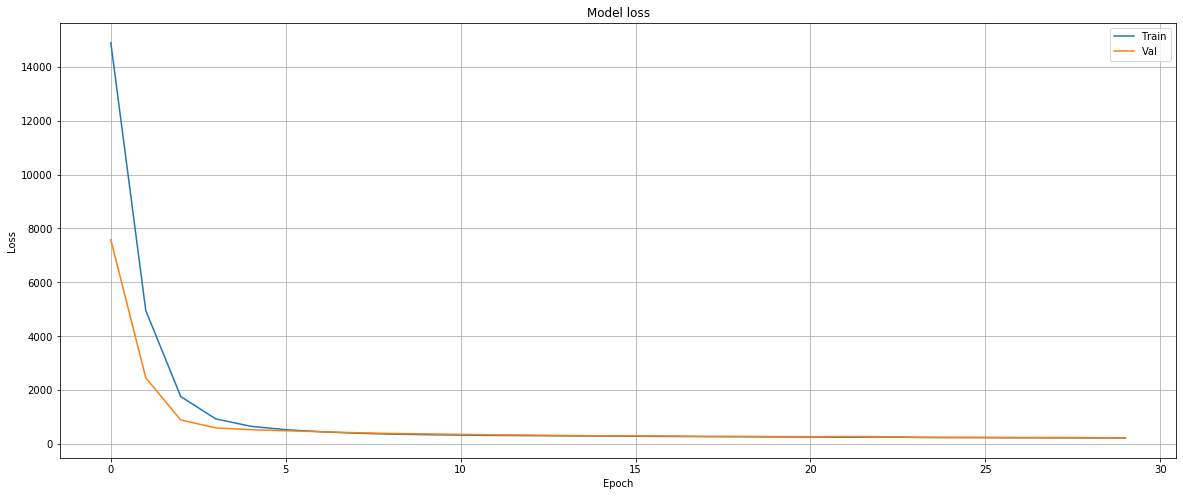

In [43]:
# Evaulating the model accuracy  
accuracy = model.evaluate(X_test, y_test)[1] * 100 
accuracy = str(accuracy)[:5]
!echo 
print('The model is {}% Accurate.'.format(accuracy))

#plotting the model accuracy
# showing a plot of the loss with respect to the number of epochs 
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [44]:
# run the prediction
well2_predict = model.predict(x_trainwell2)
well2_predict[:5, :]

array([[ 95.243286, 211.25827 ],
       [ 95.74148 , 212.51683 ],
       [ 96.519966, 214.4835  ],
       [ 96.228   , 213.74591 ],
       [ 95.52054 , 211.9587  ]], dtype=float32)

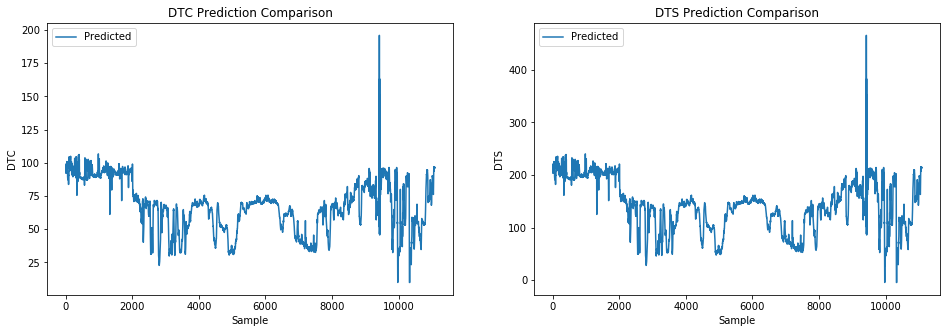

In [45]:
# plot the prediction results 
plt.subplots(nrows=1, ncols=2, figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(well2_predict[:, 0])
plt.legend(['Predicted'])
plt.xlabel('Sample')
plt.ylabel('DTC')
plt.title('DTC Prediction Comparison')
plt.plot

plt.subplot(1, 2, 2)
plt.plot(well2_predict[:, 1])
plt.legend(['Predicted'])
plt.xlabel('Sample')
plt.ylabel('DTS')
plt.title('DTS Prediction Comparison')


plt.show()




In [46]:
output_result = pd.DataFrame({'DTC':well2_predict[:,0], 'DTS':well2_predict[:,1]})
output_result.head()

,DTC,DTS
0,95.243286,211.258270
1,95.741478,212.516830
2,96.519966,214.483505
3,96.227997,213.745911
4,95.520538,211.958694


In [47]:
#output_result.to_csv(path_or_buf='./sample_submission.csv', index=False)
output_result.to_csv(path_or_buf='sample_submission2_19.csv', index=False)